# Convnet for Classifying Dog or Cat

In [1]:
import os, shutil

## Data Directory Setup
In Datasets: Dogs_vs_Cats dir containing Orig_Train containing train data from Kaggle.

2000 training, 1000 validation, 1000 testing

In [17]:
base_dir = '/home/db1070/Datasets/Dogs_vs_Cats'
original_dataset_dir = os.path.join(base_dir, 'Orig_Train')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

#os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

FileExistsError: [Errno 17] File exists: '/home/db1070/Datasets/Dogs_vs_Cats/train'

## Instantiate Convnet

In [3]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Configure Model for Training

In [6]:
from keras import optimizers

In [7]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Data Preprocessing
1. Read picture files
2. Decode jpeg content to RGB grids of pixels
3. Convert these to floating-point tensors
4. rescale values from [0, 255] to [0,1]

REQUIRES PILLOW

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


## Fit Model
batches are 20 samples, need 100 batches to reach 2000 samples

steps_per_epoch: number of batches drawn

In [11]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)


Epoch 1/30
100/100 [==============================] - 7s 70ms/step - loss: 0.6927 - acc: 0.5475 - val_loss: 0.6786 - val_acc: 0.5620
Epoch 2/30
100/100 [==============================] - 5s 53ms/step - loss: 0.6704 - acc: 0.5825 - val_loss: 0.6669 - val_acc: 0.5790
Epoch 3/30
100/100 [==============================] - 5s 53ms/step - loss: 0.6316 - acc: 0.6455 - val_loss: 0.6242 - val_acc: 0.6520
Epoch 4/30
100/100 [==============================] - 5s 54ms/step - loss: 0.5925 - acc: 0.6900 - val_loss: 0.6112 - val_acc: 0.6580
Epoch 5/30
100/100 [==============================] - 5s 53ms/step - loss: 0.5518 - acc: 0.7205 - val_loss: 0.6139 - val_acc: 0.6610
Epoch 6/30
100/100 [==============================] - 5s 52ms/step - loss: 0.5172 - acc: 0.7465 - val_loss: 0.5879 - val_acc: 0.6840
Epoch 7/30
100/100 [==============================] - 5s 51ms/step - loss: 0.4903 - acc: 0.7650 - val_loss: 0.6012 - val_acc: 0.6710
Epoch 8/30
100/100 [==============================] - 5s 51ms/step -

In [12]:
model.save('cats_and_dogs_small_1.h5') #HDF5

## Plots

In [13]:
import matplotlib.pyplot as plt

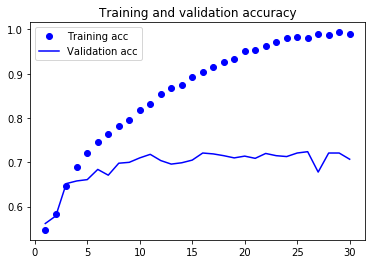

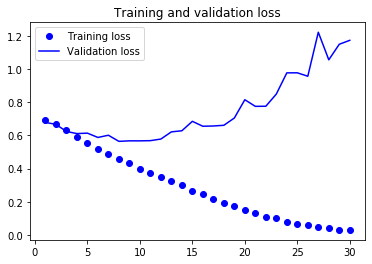

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Data Augmentation

In [15]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

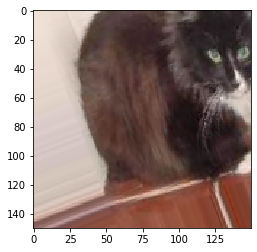

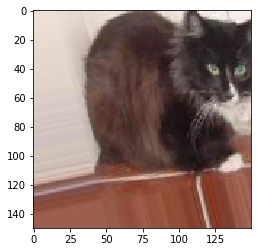

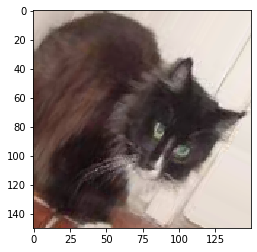

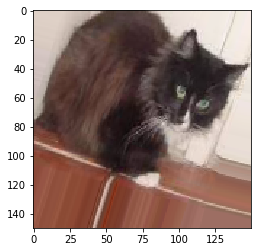

In [18]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

## Reconfigure with Data Augmentation and Dropout

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Train with Data Augmentation and Dropout

In [23]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=.2,
                                  height_shift_range=.2,
                                  shear_range=.2,
                                  zoom_range=.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255) #dont augment validation data
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150, 150),
                                                       batch_size=32,
                                                       class_mode='binary')
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 18s 184ms/step - loss: 0.6931 - acc: 0.5213 - val_loss: 0.6858 - val_acc: 0.5539
Epoch 2/100
100/100 [==============================] - 17s 166ms/step - loss: 0.6808 - acc: 0.5463 - val_loss: 0.6752 - val_acc: 0.5683
Epoch 3/100
100/100 [==============================] - 16s 163ms/step - loss: 0.6706 - acc: 0.5834 - val_loss: 0.6559 - val_acc: 0.5907
Epoch 4/100
100/100 [==============================] - 17s 166ms/step - loss: 0.6541 - acc: 0.5991 - val_loss: 0.6300 - val_acc: 0.6276
Epoch 5/100
100/100 [==============================] - 16s 165ms/step - loss: 0.6356 - acc: 0.6400 - val_loss: 0.6742 - val_acc: 0.5996
Epoch 6/100
100/100 [==============================] - 17s 166ms/step - loss: 0.6157 - acc: 0.6550 - val_loss: 0.6029 - val_acc: 0.6765
Epoch 7/100
100/100 [==============================] - 16s 165ms/step - loss: 0.6019 - acc: 0.6719 -

100/100 [==============================] - 17s 168ms/step - loss: 0.4059 - acc: 0.8188 - val_loss: 0.4259 - val_acc: 0.8065
Epoch 61/100
100/100 [==============================] - 17s 166ms/step - loss: 0.4270 - acc: 0.8037 - val_loss: 0.4800 - val_acc: 0.7822
Epoch 62/100
100/100 [==============================] - 17s 166ms/step - loss: 0.4074 - acc: 0.8122 - val_loss: 0.4427 - val_acc: 0.8135
Epoch 63/100
100/100 [==============================] - 16s 163ms/step - loss: 0.4109 - acc: 0.8134 - val_loss: 0.4283 - val_acc: 0.8222
Epoch 64/100
100/100 [==============================] - 17s 166ms/step - loss: 0.4176 - acc: 0.8066 - val_loss: 0.4997 - val_acc: 0.7726
Epoch 65/100
100/100 [==============================] - 17s 169ms/step - loss: 0.4028 - acc: 0.8197 - val_loss: 0.4394 - val_acc: 0.7976
Epoch 66/100
100/100 [==============================] - 17s 170ms/step - loss: 0.4027 - acc: 0.8209 - val_loss: 0.4146 - val_acc: 0.8125
Epoch 67/100
100/100 [==============================] 

In [24]:
model.save('cats_and_dogs_small_2.h5')

## Plots

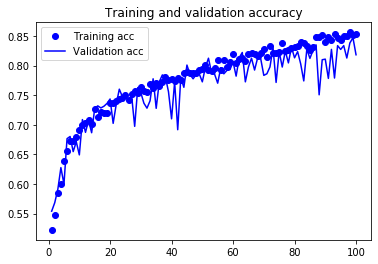

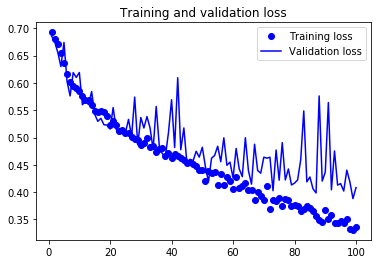

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()